In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import os
src_path = '/Users/caritsang/Project/1d_AMR/src'

if src_path not in sys.path:
    sys.path.append(src_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import grid
import FVM
import viz
from misc import calc_MSE_grid,  calc_MSE

In [3]:
# Convergence study
N = [2 ** n for n in range(4, 8)]
print(N)
reconstruction = ['godunov', 'MUSCL', 'PPM']
temporal_methods = ['RK1', 'RK2', 'RK3']
amr_methods = ['new', 'old']
refine_epsilon = np.inf
coarse_epsilon = refine_epsilon * 10
prob = 'plane'
bc_type = {'plane': 'periodic', 'sod': 'outflow'}

[16, 32, 64, 128]


In [4]:
rk1_MSE = {}
rk2_MSE = {}
vl2_MSE = {}
rk3_MSE = {}

Using old method now
Using MUSCL in spatial and RK2 in temporal.
Using linear reconstruction


Solving Simulation: 100%|██████████| 0.2/0.2 [00:05<00:00, 29.25s/s]                 


FINISHED
0.013359998358889645
total grid: 351


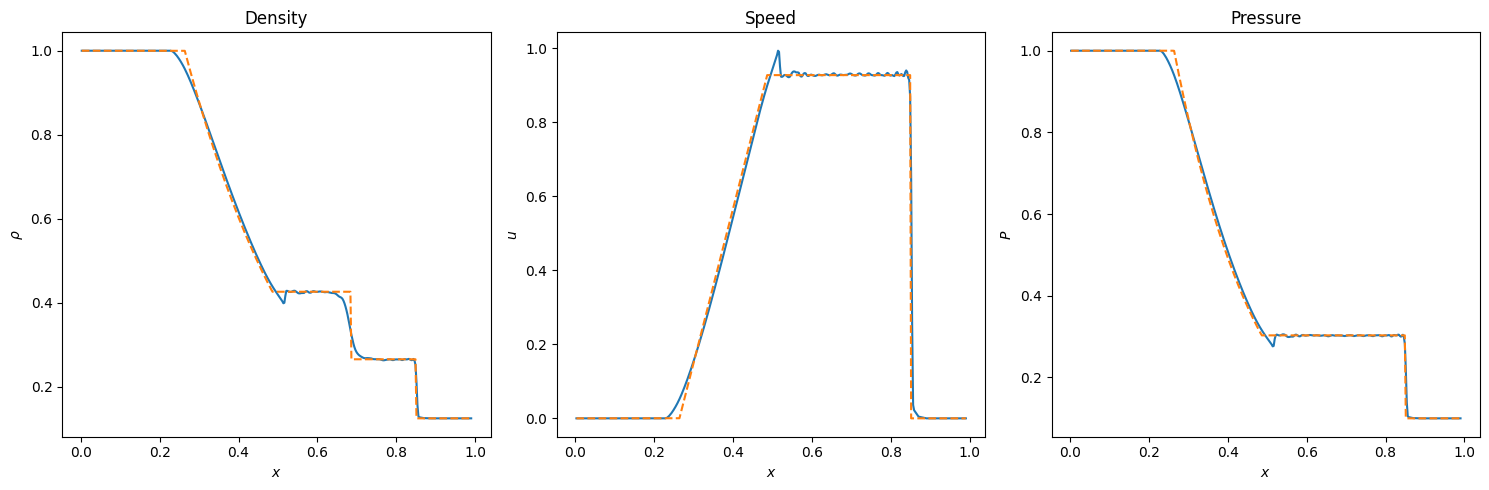

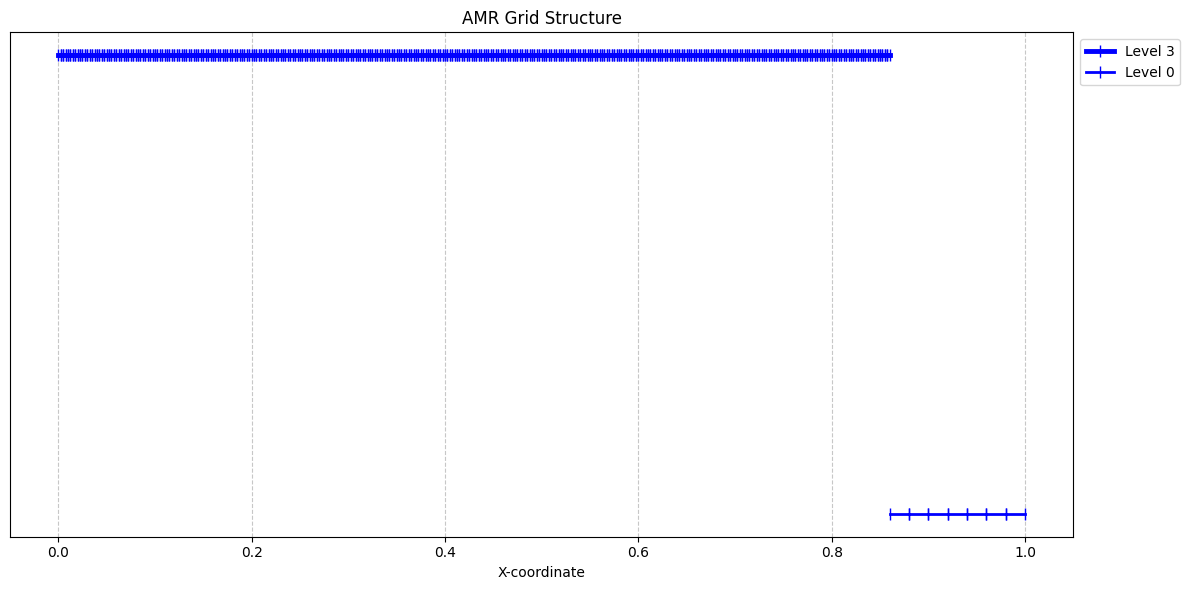

In [27]:
prob = 'sod'
grid1 = grid.grid(L=1, N=50)
grid1_history, init_con = FVM.run_sim(grid1, max_level=3, bc_type=bc_type[prob],
						prob=prob, solve_method='old', 
                        refine_epsilon=5e-1, coarse_epsilon=1e-2,
                        t_final=0.2, 
                        dt_type='RK2', dx_type='MUSCL')
viz.plot_amr_value(grid1_history[-1], type=prob, init_con=init_con)
print(calc_MSE_grid(grid1, type=prob, init_con=init_con))
viz.plot_amr_grid(grid1)
print(f"total grid: {len(grid1.get_all_active_cells())}")

Using new method now
Using MUSCL in spatial and RK2 in temporal.
Using linear reconstruction


Solving Simulation: 100%|██████████| 0.2/0.2 [00:04<00:00, 21.55s/s]                 


FINISHED
0.007025245284330175
total grid: 139


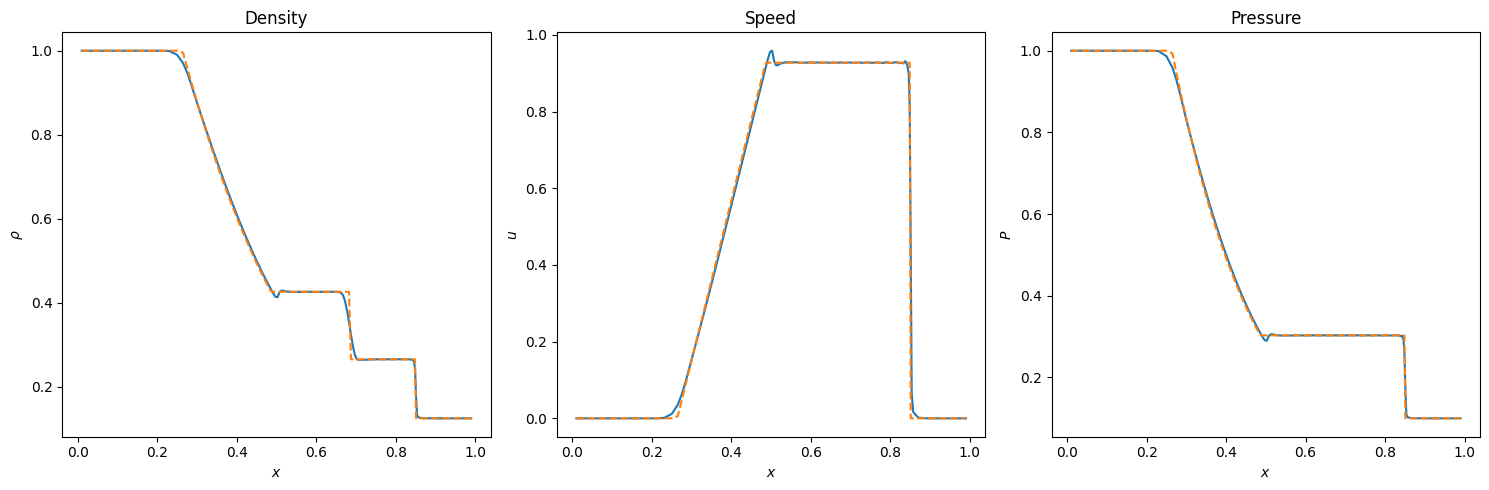

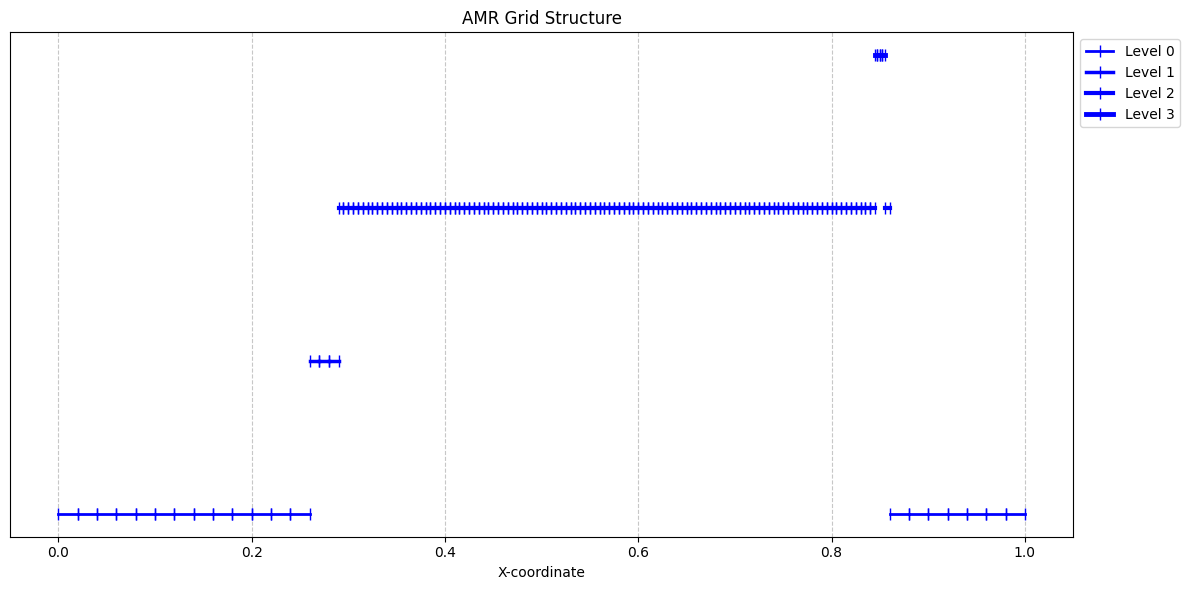

In [28]:
prob = 'sod'
grid1 = grid.grid(L=1, N=50)
grid1_history, init_con = FVM.run_sim(grid1, max_level=3, bc_type=bc_type[prob],
						prob=prob, solve_method='new', 
                        refine_epsilon=5e-1, coarse_epsilon=1e-2,
                        t_final=0.2, 
                        dt_type='RK2', dx_type='MUSCL')
viz.plot_amr_value(grid1_history[-1], type=prob, init_con=init_con)
print(calc_MSE_grid(grid1, type=prob, init_con=init_con))
viz.plot_amr_grid(grid1)
print(f"total grid: {len(grid1.get_all_active_cells())}")

In [159]:
#viz.animate(grid1_history, fps=len(grid1_history)/5, filename='test.gif', type='plane', init_con=init_con)

In [ ]:
prob = 'sod'
MSE = {}

if True:

    #for amr_method in ['old']:
    for amr_method in amr_methods:
        MSE[amr_method] = {}

        for i, method in enumerate(reconstruction[:-1]):
            MSE[amr_method][method] = {}

            mse_values = []
            for n in N:
                grid1 = grid.grid(L=1, N=n)
                grid1_history, init_con = FVM.run_sim(grid1, max_level=3, bc_type=bc_type[prob],
                        prob=prob, solve_method=amr_method, 
                        refine_epsilon=5e-1, coarse_epsilon=1e-2,
                        t_final=0.2, 
                        dt_type=temporal_methods[i], 
                        dx_type=method)
                
                print(f"Initial Cell Number: {n}, Final Cell Number: {len(grid1.get_all_active_cells())}")
                tmp = (calc_MSE_grid(grid1_history[-1], prob, init_con))
                mse_values.append(tmp)
                print(f"MSE: {tmp}")
            
            MSE[amr_method][method] = mse_values

Using new method now
Using godunov in spatial and RK1 in temporal.
Using zero-th order reconstruction


Solving Simulation: 100%|██████████| 0.2/0.2 [00:00<00:00,  1.70s/s]                


FINISHED
Initial Cell Number: 16, Final Cell Number: 62
MSE: 0.5137261077801344
Using new method now
Using godunov in spatial and RK1 in temporal.
Using zero-th order reconstruction


Solving Simulation: 100%|██████████| 0.2/0.2 [00:01<00:00,  6.02s/s]                 


FINISHED
Initial Cell Number: 32, Final Cell Number: 94
MSE: 0.5183011472649127
Using new method now
Using godunov in spatial and RK1 in temporal.
Using zero-th order reconstruction


Solving Simulation:  55%|█████▌    | 0.1107433993297001/0.2 [00:02<00:01, 20.14s/s]  


KeyboardInterrupt: 

In [61]:
colormap = {'RK1': 'b',
            'VL2': 'r',
            'RK2': 'g',
            'RK3': 'y'}

linestyle_map = {
    'godunov': '-',
    'MUSCL': '--',
    'PPM': ':'
}

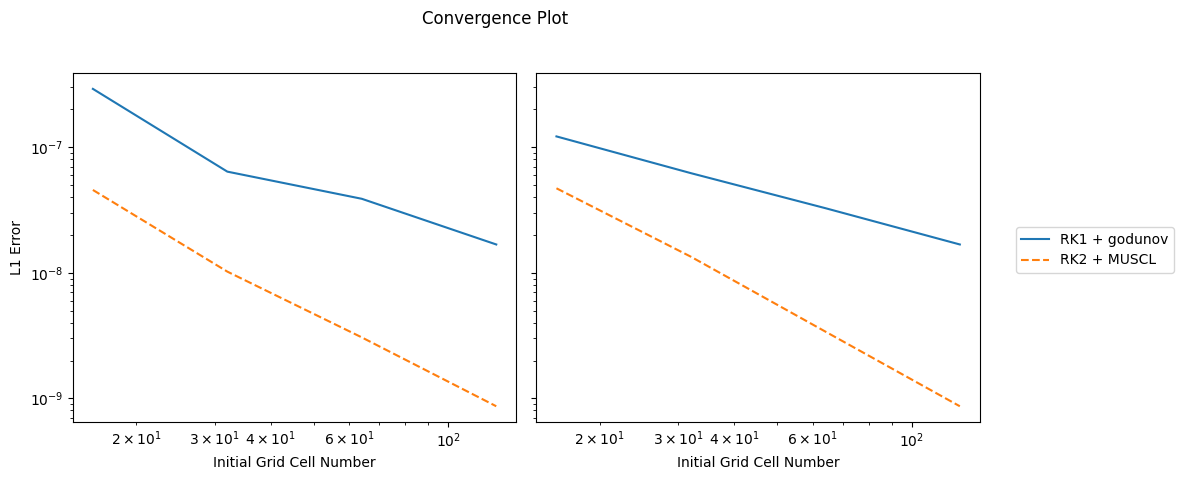

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
if True:
    for i, method in enumerate(reconstruction):
        try:
            ax[0].loglog(N, MSE['old'][method], 
                linestyle=linestyle_map[method], label=f'{temporal_methods[i]} + {method}')
            ax[1].loglog(N, MSE['new'][method], 
                linestyle=linestyle_map[method], label=f'{temporal_methods[i]} + {method}')
        except:
            pass

ax[0].set_ylabel("L1 Error")
ax[1].set_xlabel('Initial Grid Cell Number')
ax[0].set_xlabel('Initial Grid Cell Number')

all_handles, all_labels = [], []
handles1, labels1 = ax[0].get_legend_handles_labels()
handles2, labels2 = ax[1].get_legend_handles_labels()
by_label = dict(zip(labels1 + labels2, handles1 + handles2))
unique_labels = list(by_label.keys())
unique_handles = list(by_label.values())

fig.legend(unique_handles, unique_labels, loc='center', bbox_to_anchor=(1.1, 0.5))

fig.suptitle("Convergence Plot")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
